In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Градиентный спуск

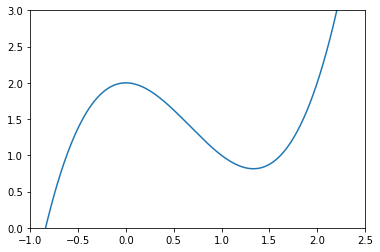

In [2]:
f = lambda x: x**3-2*x**2+2
x = np.linspace(-1,2.5,1000)
plt.plot(x,f(x))
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.show()

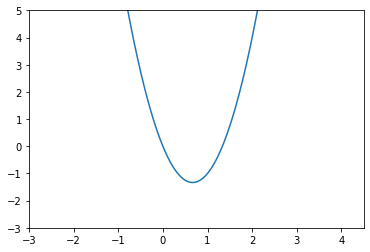

In [3]:
f_prime = lambda x: 3*x**2-4*x
x = np.linspace(-3,4.5,1000)
plt.plot(x,f_prime(x))
plt.xlim([-3,4.5])
plt.ylim([-3,5])
plt.show()

## Метод градиентного спуска

In [4]:
lr = 0.1
points = [2]
n_epochs = 15

In [5]:
for _ in range(n_epochs):
    cur_point = points[-1]
    grad = f_prime(cur_point)
    new_point = cur_point - lr * grad
    points.append(new_point)

In [6]:
y_points = [f(p) for p in points]


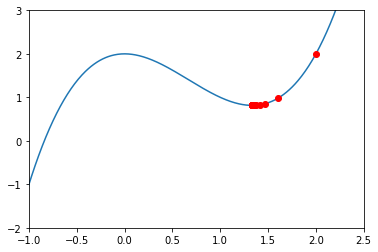

In [7]:
plt.plot(x,f(x))
plt.plot(points, y_points, 'ro')
plt.xlim([-1,2.5])
plt.ylim([-2,3])
plt.show()

## Практический пример

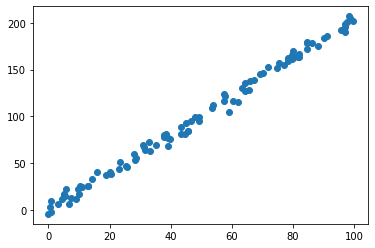

In [8]:
N = 100
X = np.random.uniform(low=0, high=100, size=N)
Y = 2*X + 1 + np.random.normal(scale=5, size=N)

plt.scatter(X, Y)
plt.show()

<img src="gradientdescentofmsetable.webp"/>

## Применим метод градиентного спуска

In [9]:
EPOCHS = 20
LEARNING_RATE = 0.0001

In [10]:
def cost_function(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i]) ** 2
    return total_cost / (2 * len(X))

In [11]:
def der_theta0(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i])
    return total_cost / (len(X))    

In [12]:
def der_theta1(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i]) * X[i]
    return total_cost / (len(X))  

In [13]:
theta0 = 1
theta1 = 1
for _ in range(EPOCHS):
    dt0 = der_theta0(X, Y, theta0, theta1)
    dt1 = der_theta1(X, Y, theta0, theta1)
    
    theta0 = theta0 - LEARNING_RATE * dt0
    theta1 -= LEARNING_RATE * dt1
    
    print("t0:", theta0, "t1:", theta1, "cost:", cost_function(X, Y, theta0, theta1))

t0: 1.0049706940490548 t1: 1.339076924043409 cost: 781.3755662962053
t0: 1.0082802184448845 t1: 1.5653679381391188 cost: 354.3731245104437
t0: 1.0104811227172148 t1: 1.7163886427620811 cost: 164.1917100153181
t0: 1.0119421636914177 t1: 1.8171759495176125 cost: 79.48734395237979
t0: 1.0129094398418235 t1: 1.8844388257365425 cost: 41.76110256557026
t0: 1.0135471907293023 t1: 1.9293283907607417 cost: 24.958315436343838
t0: 1.0139650254582087 t1: 1.9592866043543655 cost: 17.474566499717987
t0: 1.0142360942226454 t1: 1.97928003206419 cost: 14.141397661769547
t0: 1.0144092155119944 t1: 1.992623227329381 cost: 12.656843970617057
t0: 1.0145169694845806 t1: 2.0015282347505017 cost: 11.995639758358397
t0: 1.0145810992694895 t1: 2.007471313921699 cost: 11.701144845081313
t0: 1.0146161156514029 t1: 2.0114376811395864 cost: 11.56997755085792
t0: 1.0146317027411598 t1: 2.0140848434950307 cost: 11.511554283726962
t0: 1.014634323456153 t1: 2.0158516036915874 cost: 11.485530273522732
t0: 1.014628290975

In [14]:
cost_function(X,Y,1,1)

1740.0974655438333

In [15]:
# h(xi) = params[0] + params[1] * xi

EPOCHS = 12
LEARNING_RATE = 0.0001

costs = []
params = []
preds = []
params = np.random.normal(size=(2,))

for _ in range(EPOCHS):
    predictions = params[0] + params[1] * X
    preds.append(predictions)

    cost = np.sum(np.square(predictions - Y)) / (2 * len(predictions))
    costs.append(cost)
    
    params[0] -= LEARNING_RATE * np.sum(predictions - Y) / len(predictions)
    params[1] -= LEARNING_RATE * np.sum((predictions - Y) * X) / len(predictions)    

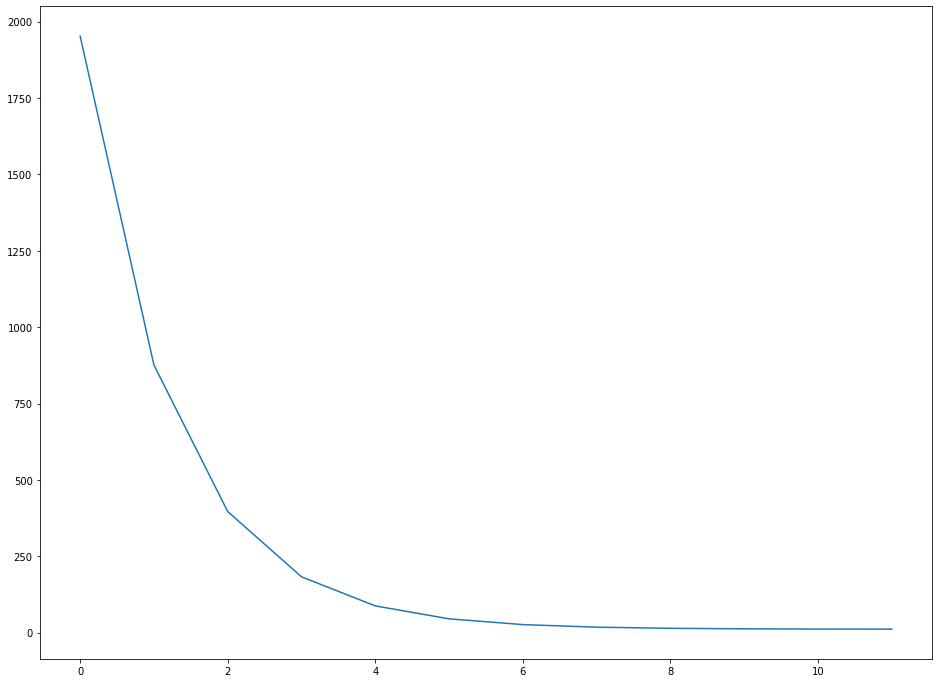

In [16]:
plt.figure(figsize=(16,12))
plt.plot(costs)
plt.show()

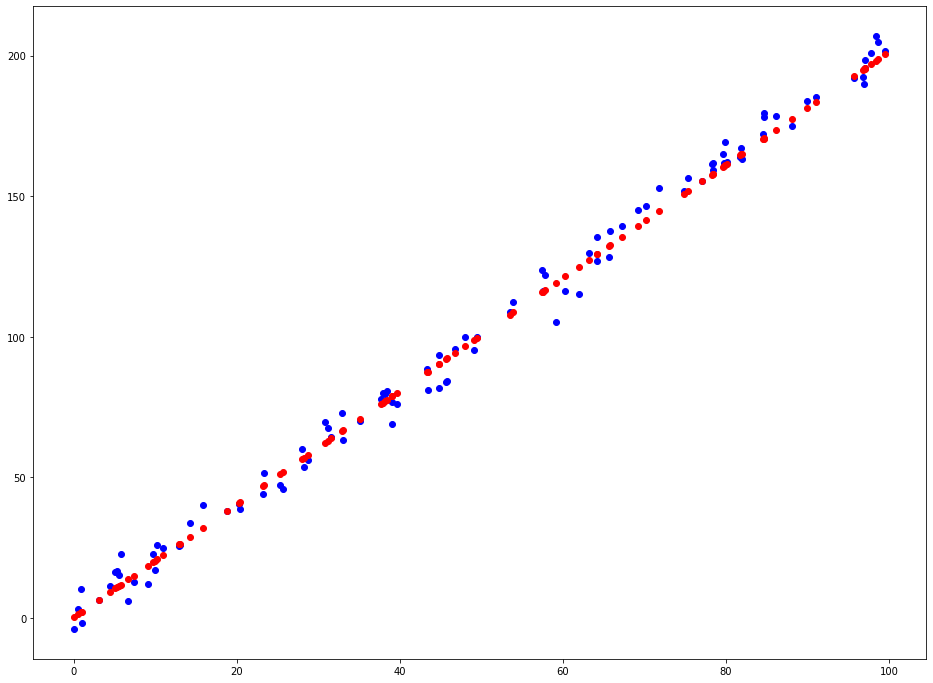

In [17]:
plt.figure(figsize=(16,12))
plt.scatter(X, Y, color='blue')
plt.scatter(X, preds[10], color='red')
plt.show()

In [18]:
params

array([0.22309081, 2.02262059])

## Метод стохастического градиентного спуска

In [19]:
EPOCHS = 120
LEARNING_RATE = 0.0001

costs = []
params = []
preds = []
params = np.random.normal(size=(2,))

for _ in range(EPOCHS):
    # Для статистики считаем общее предсказание и функцию потерь
    predictions = params[0] + params[1] * X
    preds.append(predictions)
    
    cost = np.sum(np.square(predictions - Y)) / (2 * len(predictions))
    costs.append(cost)
    
    i = np.random.choice(len(X))
    current_prediction = params[0] + params[1] * X[i]

    params[0] -= LEARNING_RATE * (current_prediction - Y[i])
    params[1] -= LEARNING_RATE * ((current_prediction - Y[i]) * X[i])

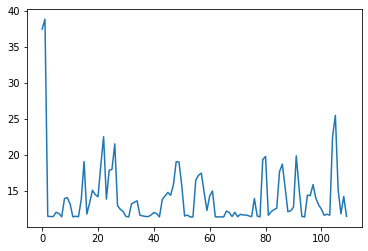

In [20]:
plt.plot(costs[10:])
plt.show()

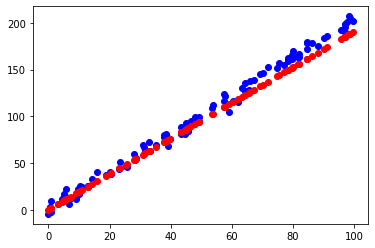

In [21]:
plt.scatter(X, Y, color='blue')
plt.scatter(X, preds[10], color='red')
plt.show()

In [22]:
from math import ceil, floor
def next_X(X, idx):
    idx_min = floor(idx)
    idx_max = ceil(idx)
    if idx_min == idx_max or idx_max >= len(X):
        return X[idx_min]
    elif idx_min < 0:
        return X[idx_max]
    else:
        return X[idx_min] + (idx - idx_min) * X[idx_max]


## Метод Nesterov momentum

In [45]:
EPOCHS = 120
LEARNING_RATE = 0.00001

costs = []
params = []
preds = []
params = np.random.normal(size=(2,))

gamma = 0.975
v = 0
i = 0

for _ in range(EPOCHS):
    # Для статистики считаем общее предсказание и функцию потерь
    predictions = params[0] + params[1] * X
    preds.append(predictions)
    
    cost = np.sum(np.square(predictions - Y)) / (2 * len(predictions))
    costs.append(cost)
    
    # Выбираем следующую точку по методу Nesterom momentum
    v = gamma * v + next_X(X, i + gamma * v) if i + gamma * v < len(X) else 0
    current_prediction = v
    i = i + 1 if i < len(X) - 1 else i

    params[0] -= LEARNING_RATE * (current_prediction - Y[i])
    params[1] -= LEARNING_RATE * ((current_prediction - Y[i]) * X[i])

In [46]:
params

array([1.47690146, 4.28037309])

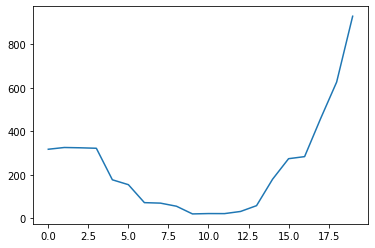

In [48]:
plt.plot(costs[50:70])
plt.show()

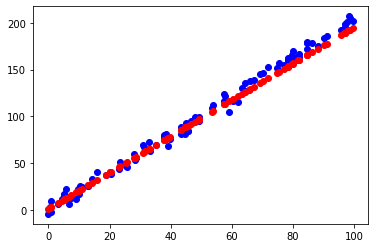

In [51]:
plt.scatter(X, Y, color='blue')
plt.scatter(X, preds[61], color='red')
plt.show()

## Метод RMSProp

In [59]:
EPOCHS = 120
LEARNING_RATE = 0.00001

costs = []
params = []
preds = []
params = np.random.normal(size=(2,))

gamma = 0.975
eps = 0.001
EG = 0
i = 0

for _ in range(EPOCHS):
    # Для статистики считаем общее предсказание и функцию потерь
    predictions = params[0] + params[1] * X
    preds.append(predictions)
    
    cost = np.sum(np.square(predictions - Y)) / (2 * len(predictions))
    costs.append(cost)
    
    # Выбираем следующую точку по методу RMSProp
    EG = gamma * EG + (1 - gamma) * X[i] * X[i]
    v = 1 / np.sqrt(EG + eps) * X[i]
    current_prediction = v
    i = i + 1 if i < len(X) - 1 else i

    params[0] -= LEARNING_RATE * (current_prediction - Y[i])
    params[1] -= LEARNING_RATE * ((current_prediction - Y[i]) * X[i])

In [60]:
params

array([0.42153147, 6.12572979])

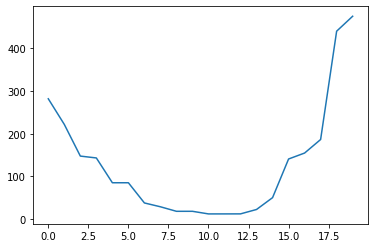

In [63]:
plt.plot(costs[30:50])
plt.show()

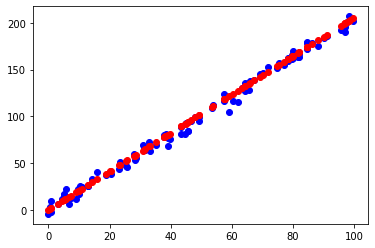

In [65]:
plt.scatter(X, Y, color='blue')
plt.scatter(X, preds[42], color='red')
plt.show()